Titanic数据集中共有11个特征：  
+ PassengerID：乘客ID 1-xxxxx  
+ Pclass：乘客等级  
+ Name：乘客姓名  
+ Sex：性别  
+ Sibsp：堂兄弟/妹个数  
+ Parch：父母与小孩个数  
+ Ticket：船票信息  
+ Fare：票价  
+ Cabin：客舱  
+ Emabarked：登船港口  
   
目标特征：  
  Survived：是否生还，0表示死亡，1表示生还

数据集文件共分为train.csv和test.csv，后者文件中不包含Survived值。

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("bmh")
plt.rc('font', family='SimHei', size=13)

## 1.首先对数据进行粗略统计分析  
o 数据集统计信息  
o 缺失值观察  
o 异常值初始观察  
o 数据分布初始观察 


In [2]:
train_path='./train.csv'
test_path='./test.csv'

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)
df=train_df.append(test_df)
df.info() # 打印数据集粗略信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [3]:
pd.isnull(df).sum() # 打印缺失值信息

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [4]:
df.describe() #打印统计数据

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


上表可以对异常值进行初始观察，重点关注min与max：  
+ Fare：船票价格平均值33.2，中位数14，平均值比中位数大很多，说明该特征分布是严重的右偏，又看到最大值512，所以512很可能是隐患的异常值。  
+ Age：最小值为0.17，最大值为80，0.17是大概刚出生一个半月的意思，而80年龄有些过大，需要进一步排查。  
+ SibSp与Parch：Sibsp最大为8，可能是异常，但又看到Parch最大值为9。这两个特征同时出现大的数值，第一放映是这个数值是有可能的，我们进步一观察。

## 2.数据可视化  
箱型图 kde图 pairplot  
箱型图有助于直观观察数据分布及异常值

#### (1) 定类/定序特征分析

In [5]:
# 此处 SibSp 与 Parch 其实不属于该类型特征
cat_list = ['Pclass','Name','Sex','SibSp','Embarked','Parch','Ticket','Cabin']
for i,cat in enumerate(cat_list):
    cat_num=df[cat].value_counts().index.shape[0]
    print('{}.{}特征的类型数目为{}'.format(i+1,cat,cat_num))

1.Pclass特征的类型数目为3
2.Name特征的类型数目为1307
3.Sex特征的类型数目为2
4.SibSp特征的类型数目为7
5.Embarked特征的类型数目为3
6.Parch特征的类型数目为8
7.Ticket特征的类型数目为929
8.Cabin特征的类型数目为186


从上面各特征值的类型数量来看：  
+ 一些比较少数量的特征如Pclass，Sex，SibSp，Embarked，Parch等可进行可视化分析。  
+ 剩下特征如Name（每个人名字都不一样），或者Ticket和Cabin由于分类太多对于可视化不是太方便，后续对这些特征单独分析。



首先探究一下Pclass，Sex，SibSp，Embarked，Parch五类特征与Survived的关系。
 

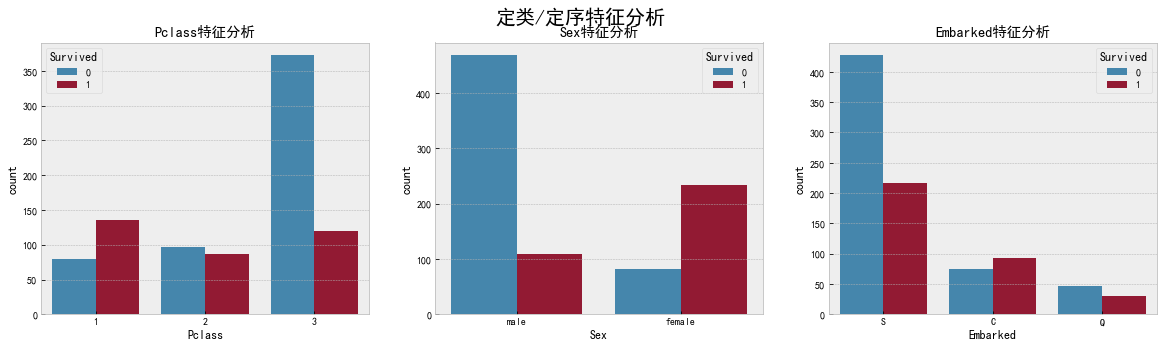

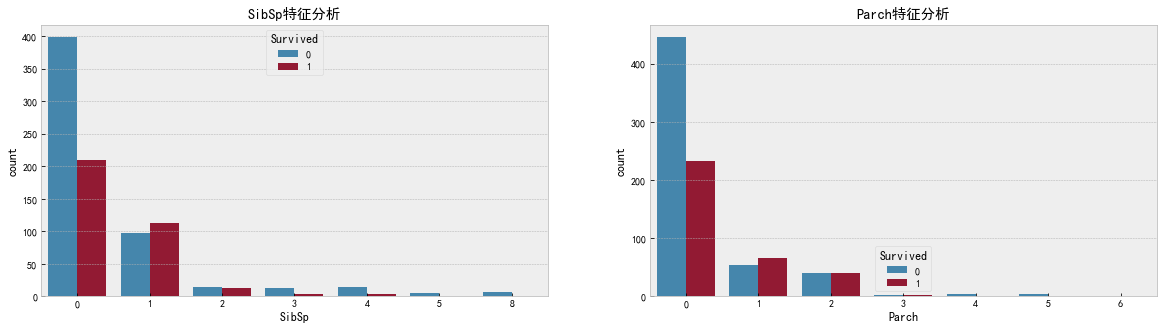

In [9]:
%matplotlib inline

f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Pclass',hue='Survived',data=train_df,ax=ax1)
sns.countplot(x='Sex',hue='Survived',data=train_df,ax=ax2)
sns.countplot(x='Embarked',hue='Survived',data=train_df,ax=ax3)
ax1.set_title('Pclass特征分析')
ax2.set_title('Sex特征分析')
ax3.set_title('Embarked特征分析')
f.suptitle('定类/定序特征分析',size=20)

f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='SibSp',hue='Survived',data=train_df,ax=ax1)
sns.countplot(x='Parch',hue='Survived',data=train_df,ax=ax2)
ax1.set_title('SibSp特征分析')
ax2.set_title('Parch特征分析')
plt.show()

结合上图我们可以观察到各特征值的分布情况，以及与目标变量之间的联系：  
+ Sex： 对于女性而言，男性总人数虽多，但是获救率明显很低（符合先救妇女的情况）；  
+ Pclass： 社会等级为3的总人数最多（推测为平民百姓），但是获救率非常低（社会等级高的人优先获救）；  
+ Embarked： 登陆港口S数量最多，但是获救率也是最低的，C港口获救率最高；  
+ SibSp： 兄弟姐妹数量最低为0的人数最多，但是获救率最低，而为1的获救率相对较高，超过50%；  
+ Parch： 情况基本同SibSp一样，后续可以考虑将二者合并；  

总之，Sex与Pclass特征与目标特征之间的关系明显且十分重要；SibSp与Parch数据分布相似且与目标特征的关系相近，故合并处理。



以上是对单个特征的考虑分析，下面综合分析Sex、Embarked、Pclass特征。  
因为Sex Pclass特征关系明显，可以寻找他们与Embarked之间的关系，从而明确Embarked的特征关系。

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


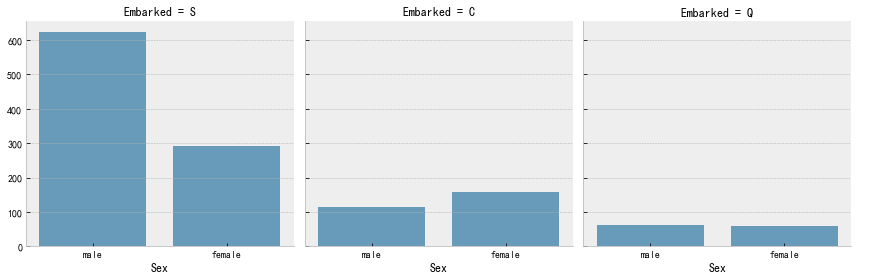

In [10]:
%matplotlib inline
grid=sns.FacetGrid(data=df,col='Embarked',size=4)
grid.map(sns.countplot,'Sex',alpha=0.8)
grid.add_legend()
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


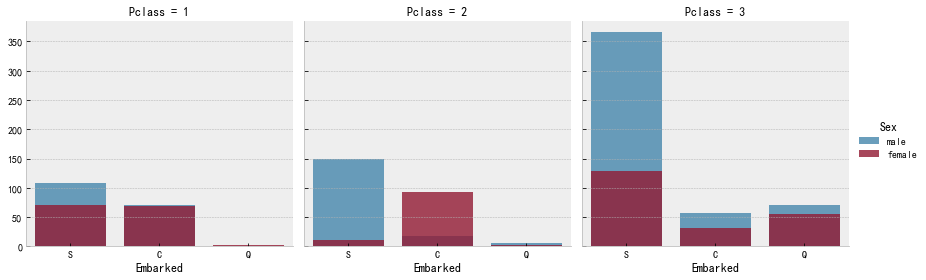

In [12]:
%matplotlib inline
grid = sns.FacetGrid(df, col='Pclass', hue='Sex', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


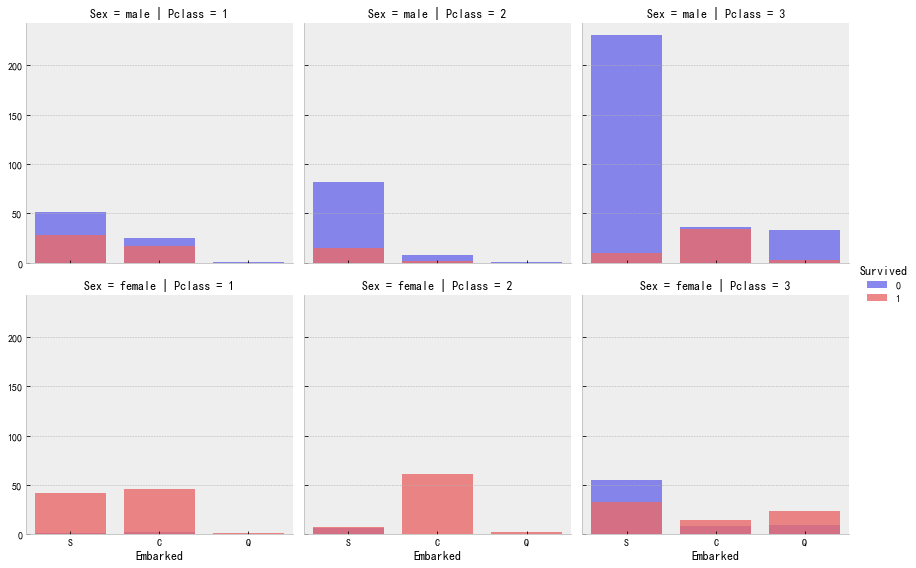

In [11]:
%matplotlib inline
grid = sns.FacetGrid(train_df, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()
plt.show()

结合上面三幅图：  
+ Pclass为1和2的时候，Q港口数量几乎为零，而Pclass3的Q港口人数甚至比C港口多。这说明社会等级与港口有关联，根据社会等级与港口的对应关系可推测S和C港口为高级港口，而Q港口为普通港口。  
+ 男性与女性在S和C港口的数量分布呈现相反趋势，既然多为女性，且女性生还概率还大，可推测C港口的生还概率也很高。



#### (2) 定距/定比特征分析  
主要是Age、Fare特征分析


Age分布及特征分析



C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


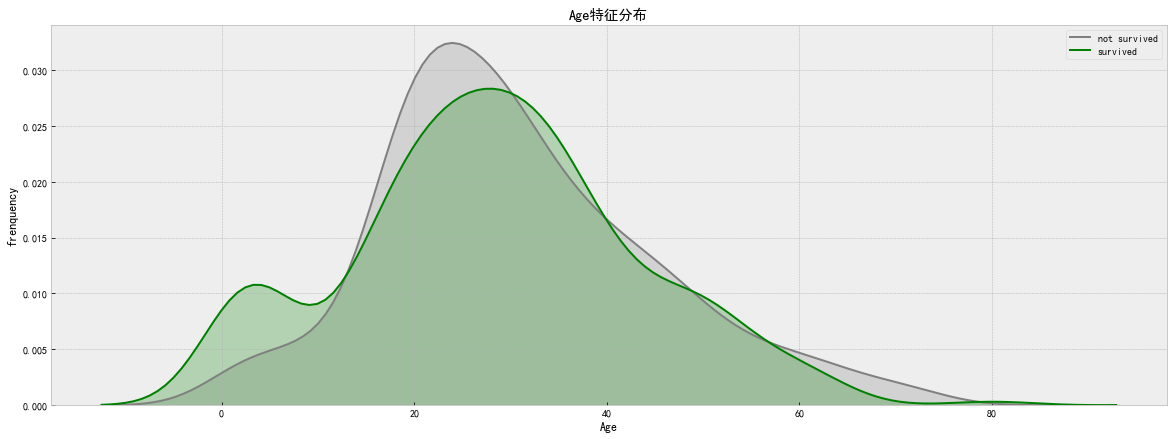

In [13]:
#matplotlib inline 
#KDE图绘制 Age与目标特征的关系
fig,ax=plt.subplots(figsize=(20,7))
sns.kdeplot(train_df.loc[(train_df['Survived']==0),'Age'],shade=True,color='gray',label='not survived')
sns.kdeplot(train_df.loc[(train_df['Survived']==1),'Age'],shade=True,color='g',label='survived')
plt.title('Age特征分布') 
plt.xlabel('Age')
plt.ylabel('frenquency')
plt.show()

观察上表可以发现年龄比较小的孩子获救率是比较高的。



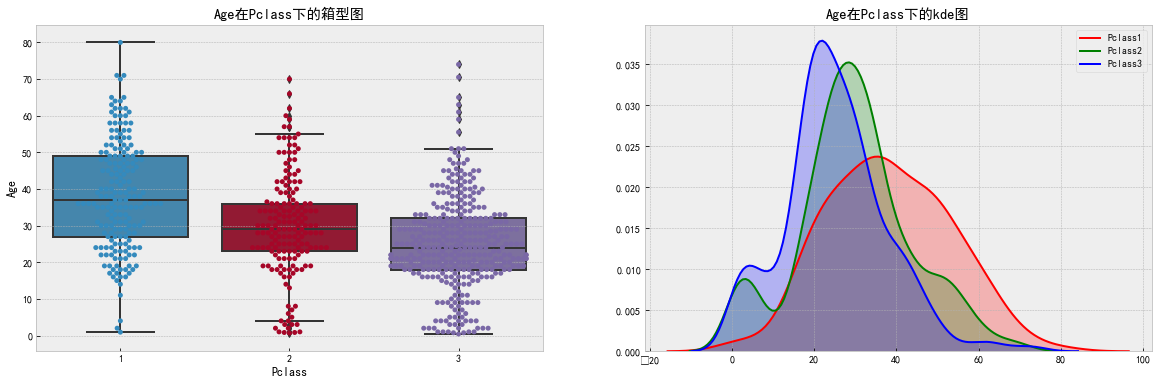

In [14]:
#matplotlib inline 
#箱型图绘制 Pclass与Age的关系
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x='Pclass',y='Age',data=train_df,ax=ax1)
sns.swarmplot(x='Pclass',y='Age',data=train_df,ax=ax1)

sns.kdeplot(train_df.loc[(train_df['Pclass']==1),'Age'],shade=True,color='r',label='Pclass1',ax=ax2)
sns.kdeplot(train_df.loc[(train_df['Pclass']==2),'Age'],shade=True,color='g',label='Pclass2',ax=ax2)
sns.kdeplot(train_df.loc[(train_df['Pclass']==3),'Age'],shade=True,color='b',label='Pclass3',ax=ax2)

ax1.set_title('Age在Pclass下的箱型图')
ax2.set_title('Age在Pclass下的kde图')
plt.show()

由上图可知，不同Pclass下的年龄分布也不同，三个分布的中位数大小按 Pclass1 > Pclass2 > Pclass3 排列。  
这也符合实际情况，Pclass1的乘客是社会上的拥有一定财富和地位的成功人士，年龄比较大，而Pclass3的人数最多，  
因为大多数人还都是普通人（有钱人毕竟少数），并且这些人多是年轻人，年龄在20-30之间。

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


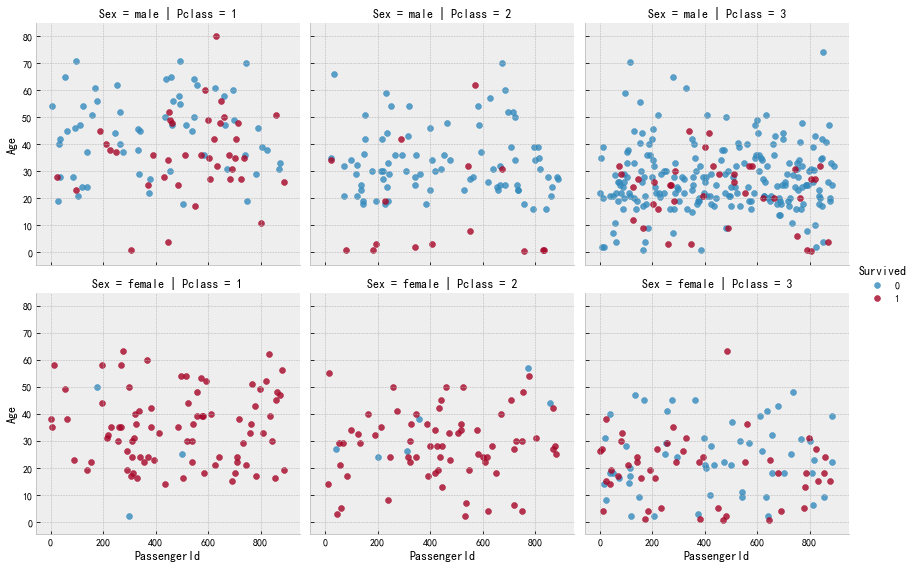

In [15]:
%matplotlib inline
grid=sns.FacetGrid(data=train_df,row='Sex',col='Pclass',hue='Survived',size=4)
grid.map(plt.scatter,'PassengerId','Age',alpha=0.8)
grid.add_legend()
plt.show()


由上表可知：  
+ Pclass1和Pclass2的女性几乎都是Survived的，Pclass3中女性Survived则不是很明显了。  
+ Pclass1的男性生还率最高，Pclass2和Pclass3的生还率比较低，但是Pclass2中年龄小的乘客几乎全部生存。  

***妇女和孩子优先营救***



Fare特征分布及分析

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


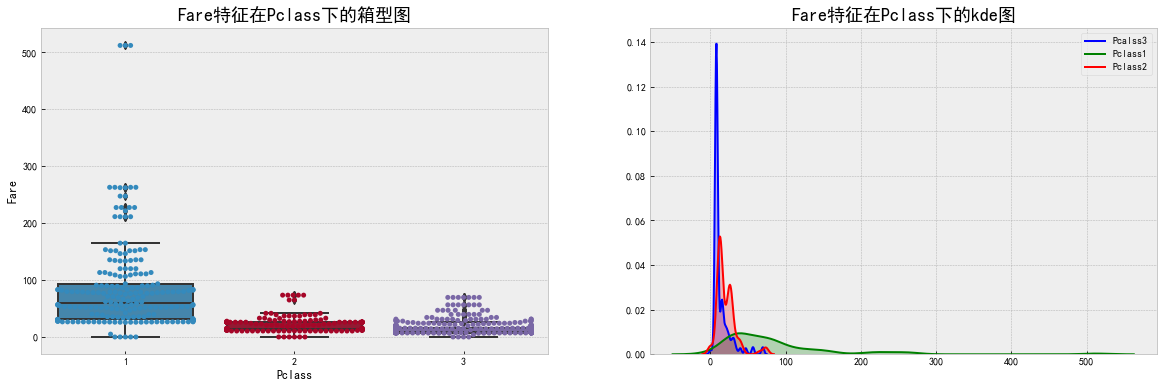

In [16]:
%matplotlib inline
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Fare", data=train_df, ax =ax1)
sns.swarmplot(x="Pclass", y="Fare", data=train_df, ax =ax1)
sns.kdeplot(train_df.loc[(train_df['Pclass'] == 3),'Fare'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(train_df.loc[(train_df['Pclass'] == 1),'Fare'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(train_df.loc[(train_df['Pclass'] == 2),'Fare'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Fare特征在Pclass下的箱型图', fontsize = 18)
ax2.set_title("Fare特征在Pclass下的kde图", fontsize = 18)
fig.show()


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


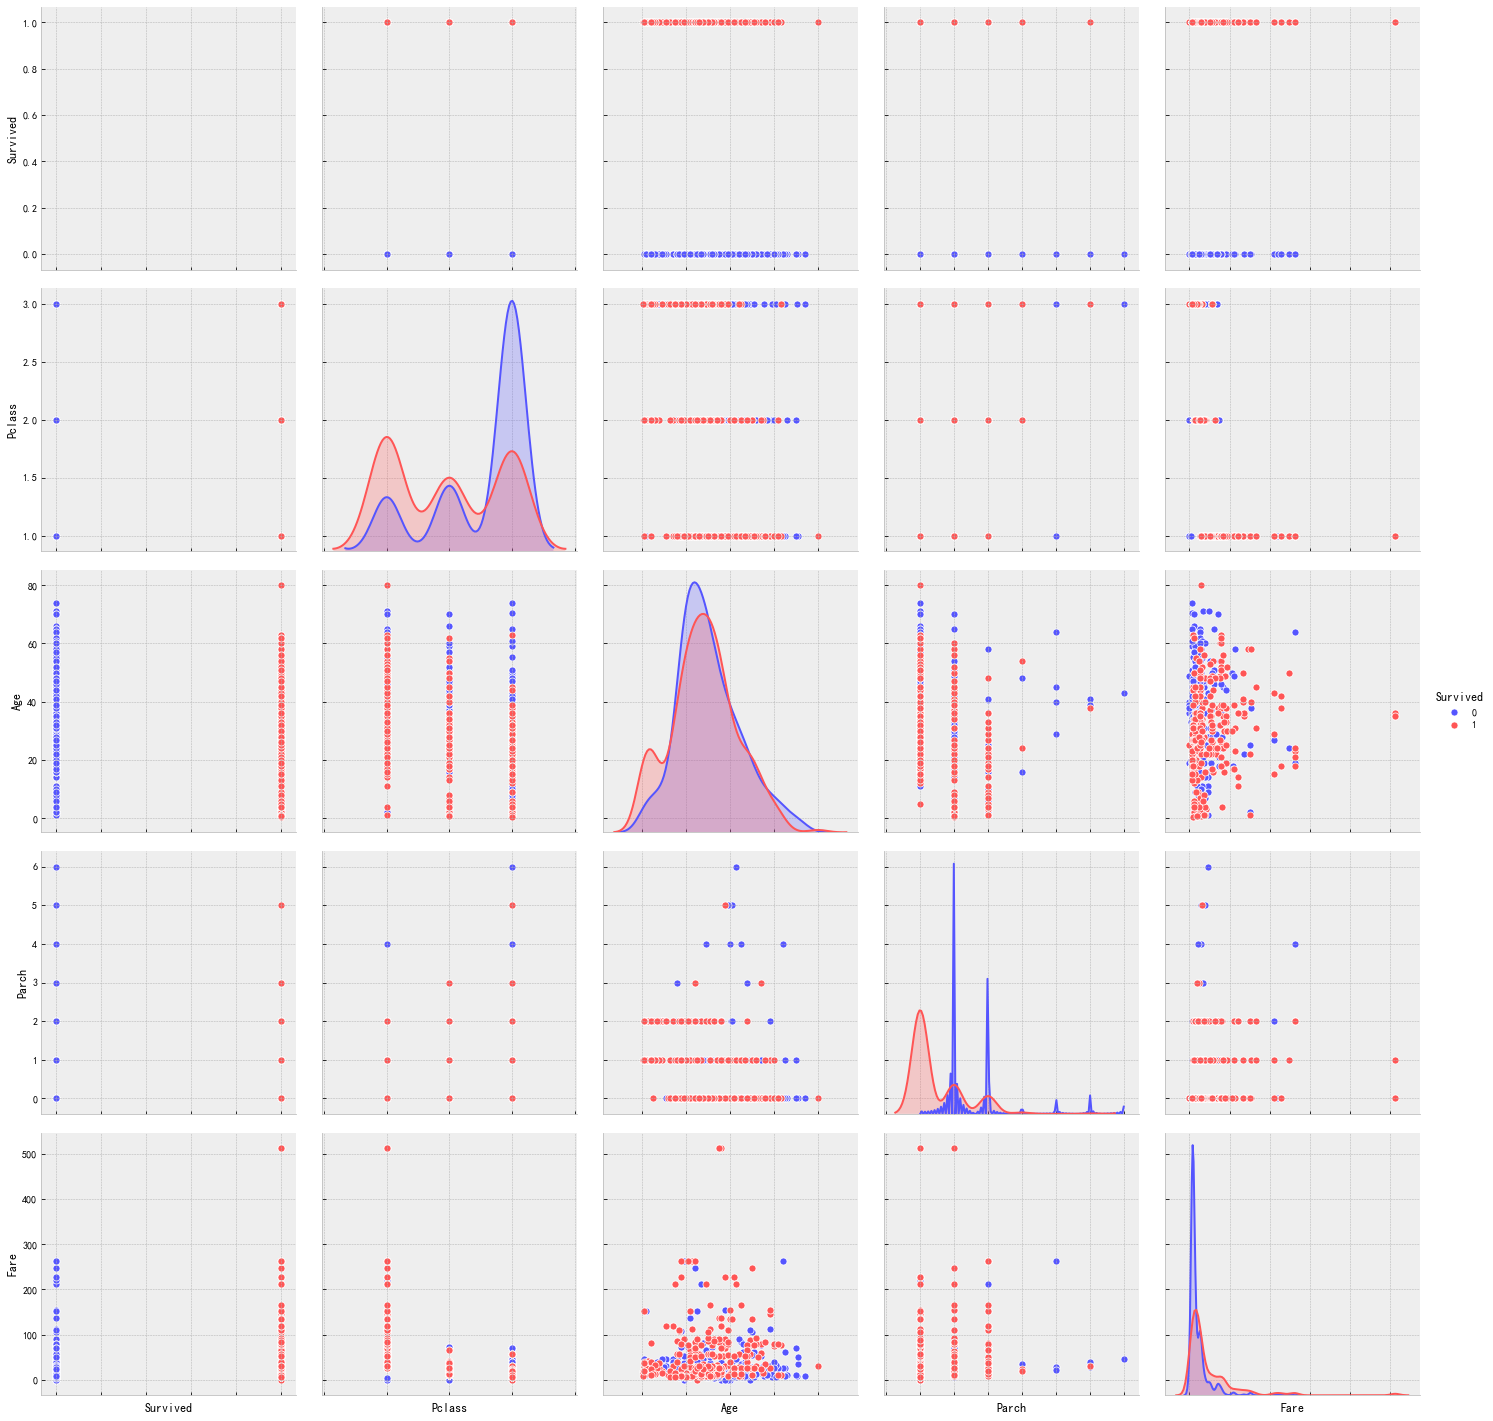

In [17]:
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette = 'seismic',
                 size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
g.set(xticklabels=[])
